# Guiding questions

How does postdoctorate gender diversity at Columbia compare to its peer institutions?

In [1]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TOTALS = pickle.load(open('../../../data/Broad_Sex_RaceEthnicity_Postdoctorates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [3]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions)):
    cols = 2
    rows = math.ceil(num / 2)
    return plt.subplots(rows, cols, figsize=(10 * cols, 10 * rows))

def get_proportions(inst, field):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            fem_count = field_stats.get('Female', 0)
            if isinstance(fem_count, dict):
                fem_count = fem_count['Total for selected values']
                
            proportions.append(
                fem_count /
                    field_stats['Total for selected values']['Total for selected values']
            )
    return proportions

def compare_field_subplots(field):
    fig, axArr = subplots()
    for i, inst in enumerate(institutions):
        ax = axArr[i // 2, i % 2]
        plot_field(ax, inst, field)
    fig.suptitle(f'{field}')
    fig.tight_layout()

def plot_inst(ax, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst == highlight:
            continue
        ax.plot(years, get_proportions(inst, field), label=inst)
    ax.plot(years, get_proportions(highlight, field), label=highlight, linewidth=3, color='black')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(field)

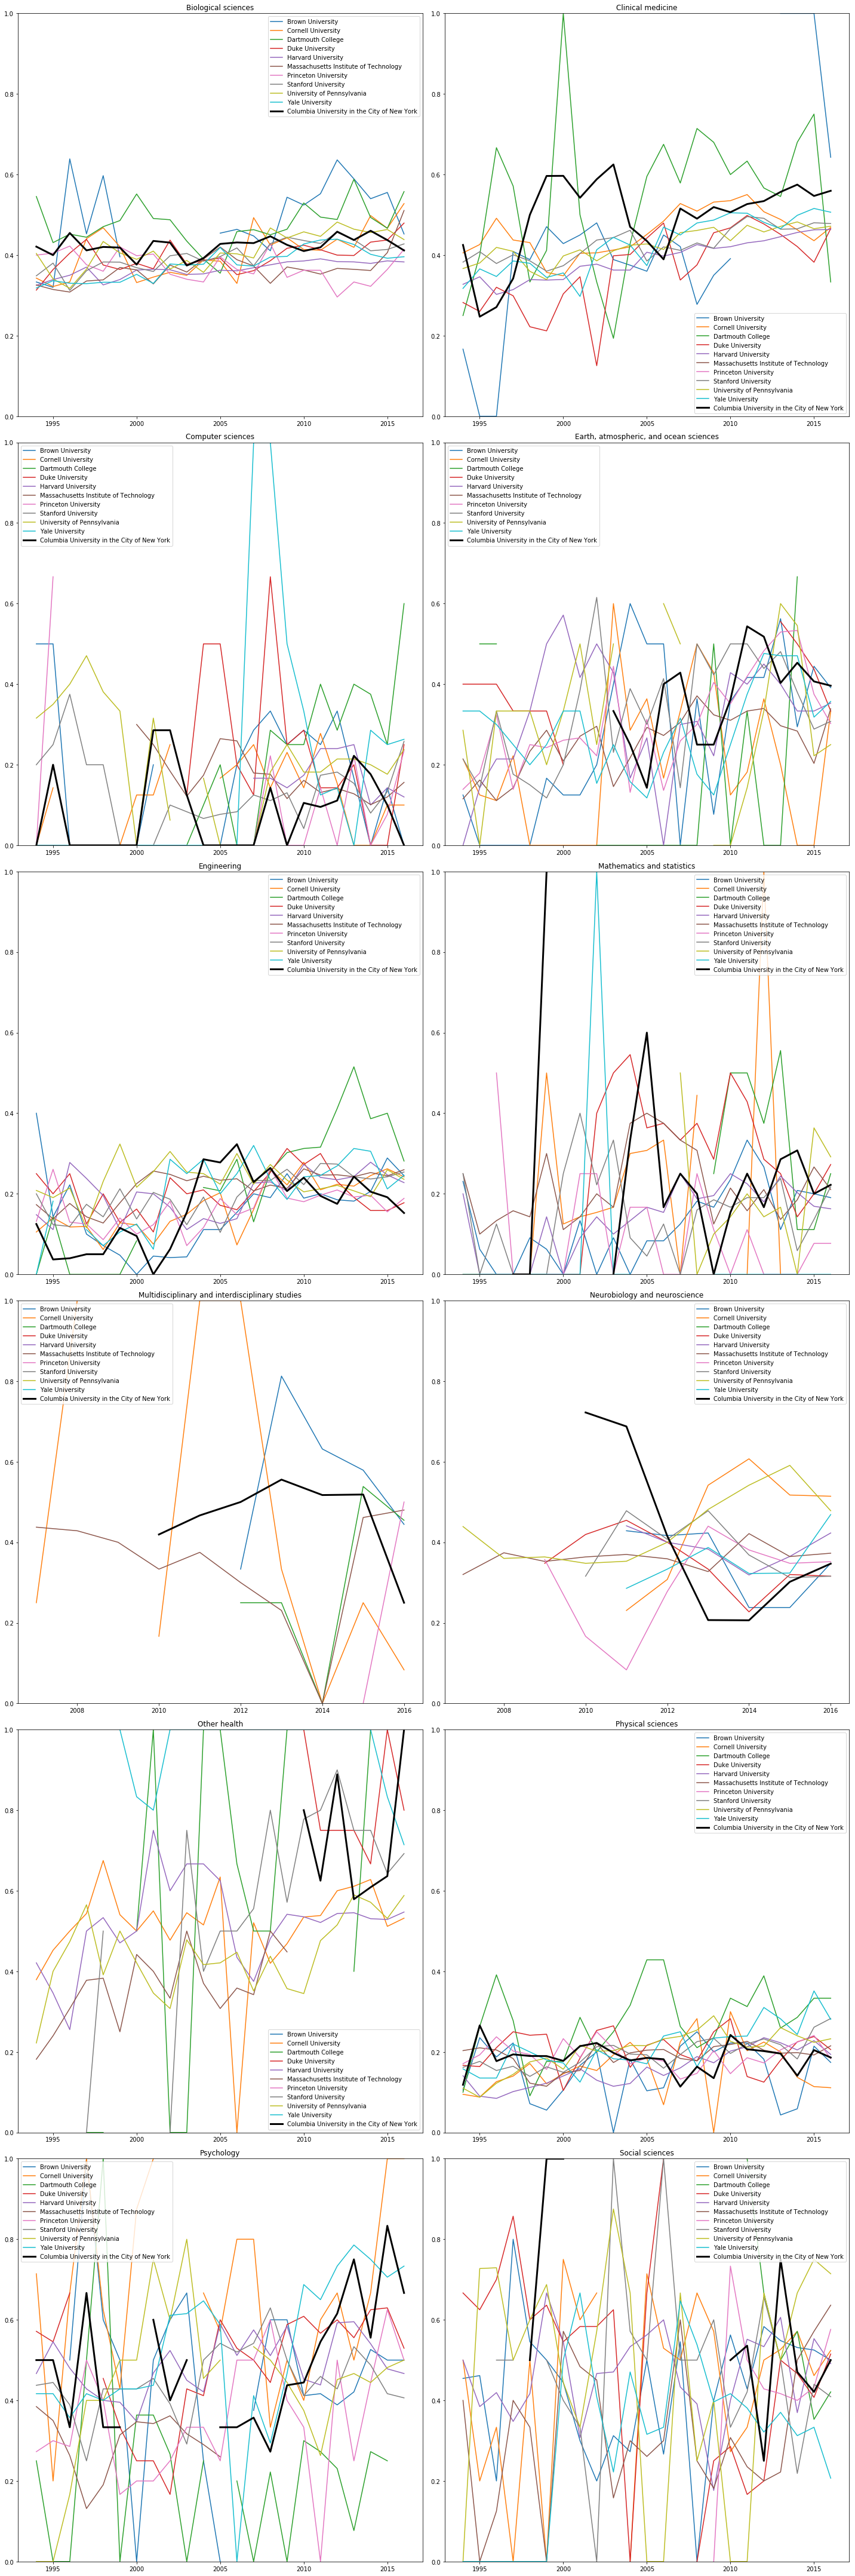

In [4]:
fig, axArr = subplots(len(fields))
for i, field in enumerate(fields):
    ax = axArr[i // 2, i % 2]
    plot_inst(ax, field)
fig.tight_layout()